In [3]:
library(data.table)
library(stringr)
library(plyr)
library(ggplot2)
library(ggpubr)


Warning message:
“package ‘data.table’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘ggpubr’ was built under R version 4.2.3”

Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate




## 3. SFS

In [15]:
INDIR = "/data2/kantian/LineageTracing/SMALT/0.Results/2.final_phy_re/"
OUTDIR = "/data2/kantian/LineageTracing/SMALT/0.Results/figures/"
# samplelist <- read.delim("F:/SMALT/Results/sample_list_phy_filtered.txt",header = T)
# setDT(samplelist)
# samplelist[, sampleType := paste0(cat, "_",type)]
sampleTypes = c("WT_N","Apc_N","IBD_N","Apc_P","IBD_T")
samplesall = list(c("WT1_N5","WT1_N7","WT2_N3","WT2_N5"),
                  c("68_N","72_N","71_N","75_N"),
                  c("2_N","4_N","5_N","16_N","19_N","47_N1","47_N4","47_N5","47_N6","47_N8",
                    "49_N","50_N","65_N","66_N", "132_N","17_N","151_N","142_N","148_N"),
                  c("68_P1","68_P2","68_P3","68_P4","68_P5-1","68_P5-2","68_P5-3",
                    "68_P5-4","68_P5-5","68_P5","72_P1","72_P2","72_P4","72_P5","72_P6","72_P8","72_P9",
                    "71_P3","75_P3","75_P5","75_P8","75_P11"),
                  c("2_T2","2_T3","4_T","5_T","16_T","47_T1","47_T4","47_T5","47_T6","47_T8",
                    "49_T1","49_T3","50_T","65_T1","65_T3","66_T","19_T1","19_T3","19_T4","19_T5",
                    "132_T1","151_T4","17_T4","18_T3","18_T4","142_T1","142_T2","142_T5-4","148_T1","148_T3")
                  )


In [16]:
setwd(INDIR)
dt <- data.table()
for(my.type in 1:length(sampleTypes)){
  message("Calculating ", my.type, "...")
  subs <- samplesall[[my.type]]
  for(my.sample in subs){
    message("\tCalculating ", my.sample, "...")
    x <- read.delim(paste0(INDIR,my.sample,"_filtered_re.phy"),header = F, sep = " ",
                    colClasses=c("character","character"),skip = 2,
                    col.names = c("cellID","bi"))
    ## 
    numSite=nchar(x$bi[1])
    ##
    
    y = matrix(unlist(strsplit(t(x$bi), "")), nrow = nrow(x), byrow = TRUE)
    y <- as.data.table(y)
    y <- sapply(y, as.numeric )
    dt <- rbind(dt, data.table(sampleType = sampleTypes[my.type], sample = my.sample,
                               sfs = colSums(y)/nrow(y), site = 1:numSite))
  }
}



df <- dt[sfs >= 0.01]
df[, mono := ifelse(sfs >=0.75, "Monoclonal","Polyclonal")]


Calculating 1...

	Calculating WT1_N5...

	Calculating WT1_N7...

	Calculating WT2_N3...

	Calculating WT2_N5...

Calculating 2...

	Calculating 68_N...

	Calculating 72_N...

	Calculating 71_N...

	Calculating 75_N...

Calculating 3...

	Calculating 2_N...

	Calculating 4_N...

	Calculating 5_N...

	Calculating 16_N...

	Calculating 19_N...

	Calculating 47_N1...

	Calculating 47_N4...

	Calculating 47_N5...

	Calculating 47_N6...

	Calculating 47_N8...

	Calculating 49_N...

	Calculating 50_N...

	Calculating 65_N...

	Calculating 66_N...

	Calculating 132_N...

	Calculating 17_N...

	Calculating 151_N...

	Calculating 142_N...

	Calculating 148_N...

Calculating 4...

	Calculating 68_Ade1...

	Calculating 68_Ade2...

	Calculating 68_Ade3...

	Calculating 68_Ade4...

	Calculating 68_Ade5-1...

	Calculating 68_Ade5-2...

	Calculating 68_Ade5-3...

	Calculating 68_Ade5-4...

	Calculating 68_Ade5-5...

	Calculating 68_Ade5...

	Calculating 72_Ade1...

	Calculating 72_Ade2...

	Calculati

In [17]:
mono <- as.data.table(table(df[sfs>=0.75 , sample]))[N>=4]  #& site !=2605 & site !=2674
mono

V1,N
<chr>,<int>
142_T1,19
148_T1,4
16_T,20
19_T3,11
4_T,36
49_T1,12
49_T3,22
5_T,11
65_T1,5


In [17]:
length(c("2_T2","2_T3","4_T","5_T","16_T","47_T1","47_T4","47_T5","47_T6","47_T8",
                    "49_T1","49_T3","50_T","65_T1","65_T3","66_T","19_T1","19_T3","19_T4","19_T5",
                    "132_T1","151_T4","17_T4","18_T3","18_T4","142_T1","142_T2","142_T5-4","148_T1","148_T3")
                  )

[1] 30

Warning message:
“Removed 40 rows containing missing values (`geom_bar()`).”


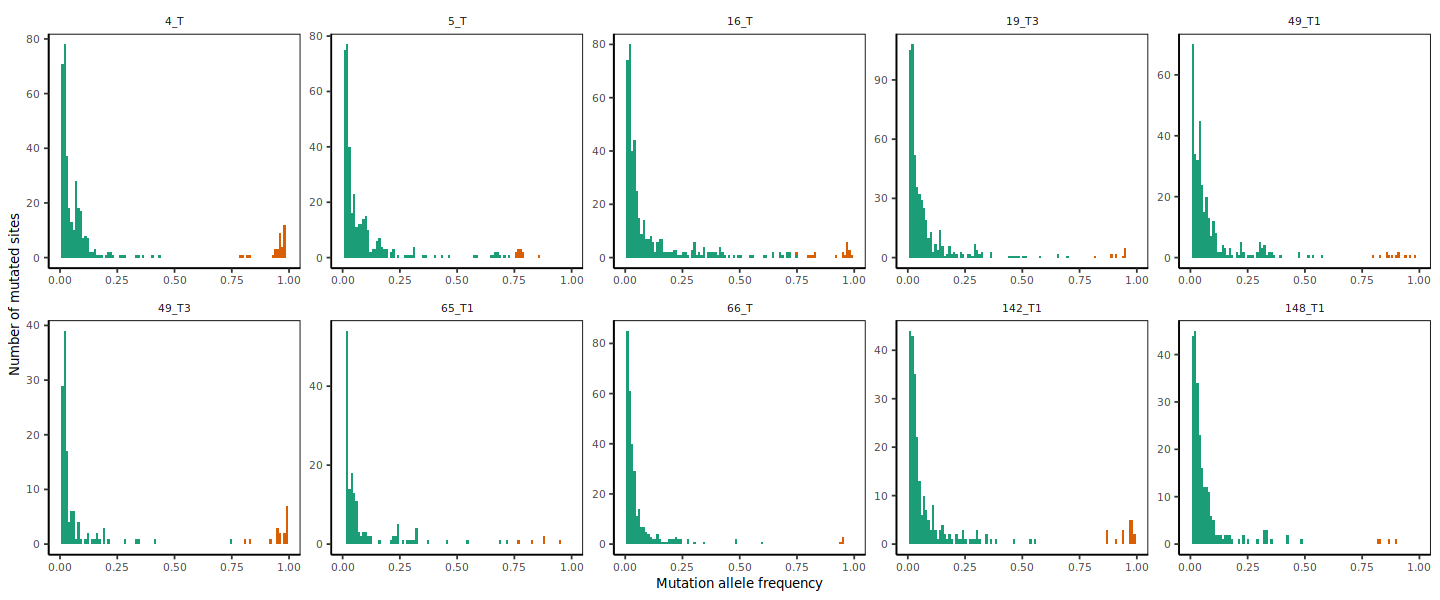

In [13]:
# p3 <- ggplot(df[sample %in% c("4_T")  & site !=2605], aes(x=sfs, fill= mono))+
#   geom_histogram(bins = 100)+xlim(0,1)+
#   facet_wrap(~sample,ncol=1,strip.position = "right")+scale_y_log10()+
#   scale_fill_manual(values = c(Polyclonal="#1B9E77",Monoclonal="#D95F02"))+theme_classic()+
#   xlab("Mutation allele frequency")+ylab("Number of mutated sites")+
#   theme(legend.position=c("none"),plot.title = element_text(hjust = 0.5),
#         text = element_text(size=10))
temp <- df[sample %in% c("4_T","5_T","16_T","19_T3","49_T1","49_T3","65_T1","66_T","142_T1","148_T1")  ]
temp$sample <- factor(temp$sample, levels =c("4_T","5_T","16_T","19_T3","49_T1","49_T3","65_T1","66_T","142_T1","148_T1"))



dt <- do.call(rbind, lapply(split(temp, temp$sample),function(a){
  d = density(a$sfs,n=1000)
  data.table(sample = a$sample[1], x=d$x, y=d$y)
}))
dt[,clonality := ifelse(x <0.75, "Polyclonal","Monoclonal")]
# p1 <- ggplot(dt, aes(x=x,y=y))+geom_line()+geom_area(aes(fill=clonality))+facet_wrap(~sample,ncol=4,nrow=5,scale="free")+
#   theme_classic()+xlim(0,1)+
#   scale_fill_manual(values = c(Polyclonal="#1B9E77",Monoclonal="#D95F02"))+
#   ggtitle("")+xlab("Mutation allele frequency")+ylab("Density")+
#     theme(strip.background = element_blank(), legend.key.size = unit(0.3,"cm"),
#             text = element_text(size=10),legend.title=element_text(size=8),
#             legend.text = element_text(size = 8),
#             legend.position=c("none"),plot.title = element_text(hjust = 0.5))

p2 <- ggplot(temp, aes(x=sfs, fill= mono))+
  geom_histogram(bins = 100)+xlim(0,1)+#ylim(0,100)+
  facet_wrap(~sample,ncol=5,nrow=2,scale="free")+#scale_y_log10()+
  scale_fill_manual(values = c(Polyclonal="#1B9E77",Monoclonal="#D95F02"))+theme_classic()+
  xlab("Mutation allele frequency")+ylab("Number of mutated sites")+
  theme(legend.position=c("none"),plot.title = element_text(hjust = 0.5),
        text = element_text(size=8),strip.background=element_blank(),panel.border=element_rect(color="black",fill=NA))#+scale_y_continuous(breaks=c(0,1,10,100))#+scale_y_log10()
options(repr.plot.width = 12, repr.plot.height = 5)
p2
# p2+expand_limits(y=0)

In [71]:
pdf(file = paste0(OUTDIR,"fig2E.IBD_T_mono_SFS.pdf"), width=9, height =3)
p2#+expand_limits(y=0)
dev.off()
pdf(file = paste0(OUTDIR,"fig2E.IBD_T_mono_SFS_log.pdf"), width=9, height =3)
p2+scale_y_log10()
dev.off()


Warning message:
“Removed 40 rows containing missing values (`geom_bar()`).”


png 
  2

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 1591 rows containing missing values (`geom_bar()`).”


png 
  2

Warning message:
“Removed 52 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 52 rows containing missing values (`geom_bar()`).”


png 
  2

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 2031 rows containing missing values (`geom_bar()`).”


png 
  2

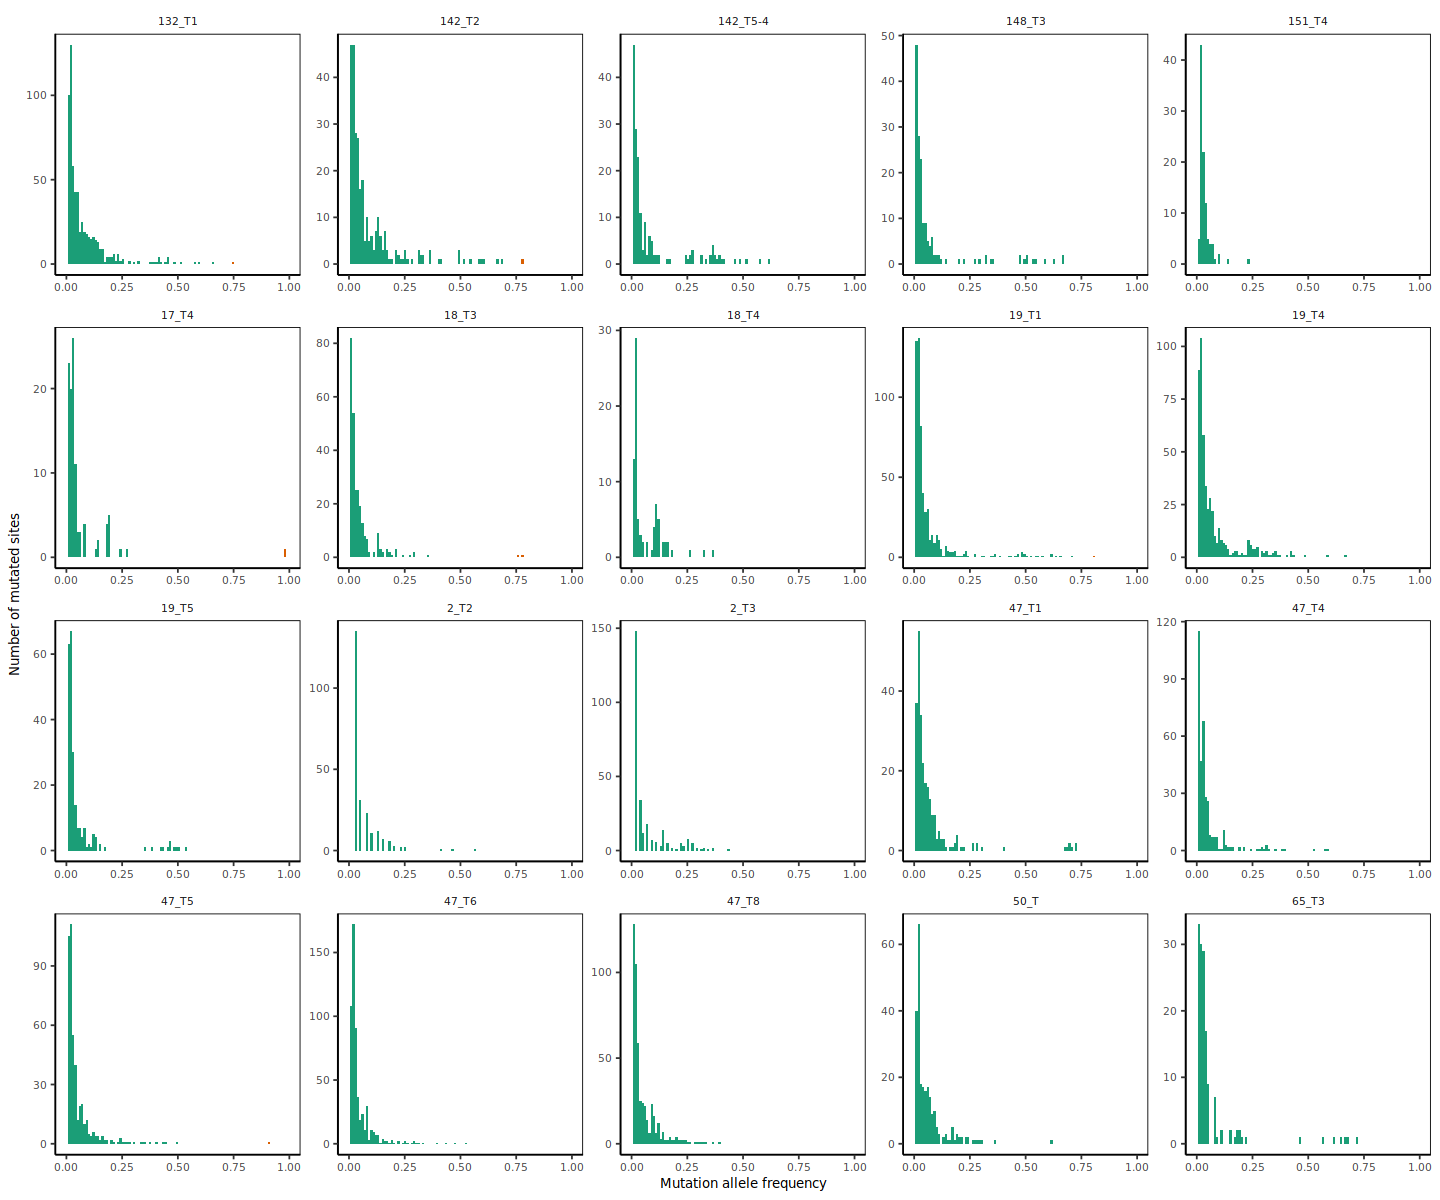

In [72]:
p3 <- ggplot(df[sample %in% c("2_T2","2_T3","4_T","5_T","16_T","47_T1","47_T4","47_T5","47_T6","47_T8",
                    "49_T1","49_T3","50_T","65_T1","65_T3","66_T","19_T1","19_T3","19_T4","19_T5",
                    "132_T1","151_T4","17_T4","18_T3","18_T4","142_T1","142_T2","142_T5-4","148_T1","148_T3") & ! sample %in% 
                c("4_T","5_T","16_T","19_T3","49_T1","49_T3","65_T1","66_T","142_T1","148_T1")  ], aes(x=sfs, fill= mono))+
  geom_histogram(bins = 100)+xlim(0,1)+#ylim(0,100)+
  facet_wrap(~sample,ncol=5,nrow=4,scale="free")+#scale_y_log10()+
  scale_fill_manual(values = c(Polyclonal="#1B9E77",Monoclonal="#D95F02"))+theme_classic()+
  xlab("Mutation allele frequency")+ylab("Number of mutated sites")+
  theme(legend.position=c("none"),plot.title = element_text(hjust = 0.5),
        text = element_text(size=8),strip.background=element_blank(),panel.border=element_rect(color="black",fill=NA))#+scale_y_continuous(breaks=c(0,1,10,100))#+scale_y_log10()
options(repr.plot.width = 12, repr.plot.height = 10)
p3
pdf(file = paste0(OUTDIR,"fig2E.IBD_T_poly_SFS.pdf"), width=9, height =6)
p3#+expand_limits(y=0)
dev.off()
pdf(file = paste0(OUTDIR,"fig2E.IBD_T_poly_SFS_log.pdf"), width=9, height =6)
p3+scale_y_log10()
dev.off()


Warning message:
“Removed 40 rows containing missing values (`geom_bar()`).”


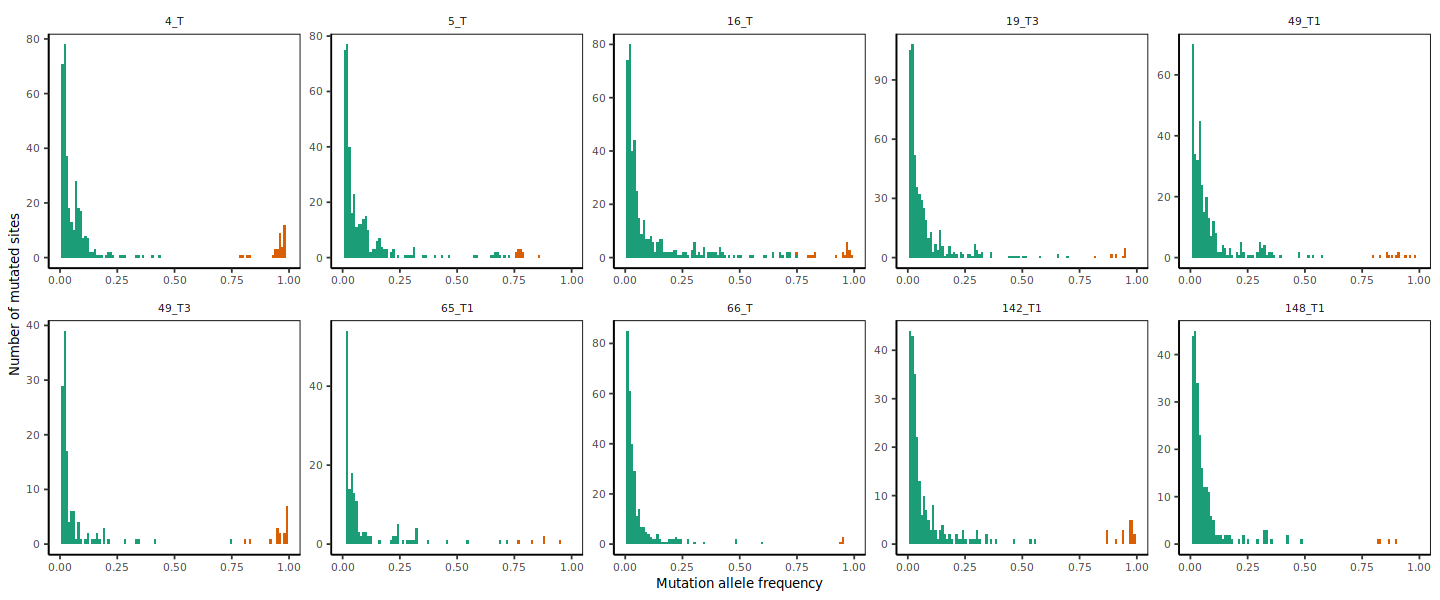

In [21]:
p2

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 393 rows containing missing values (`geom_bar()`).”


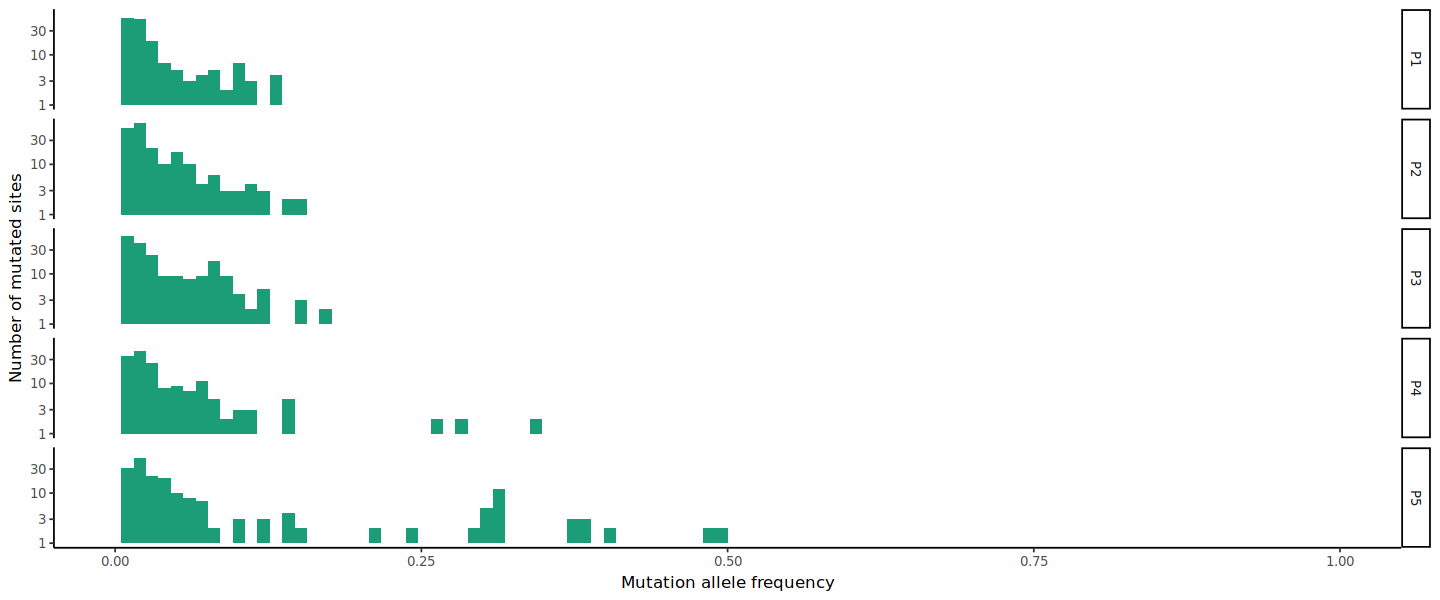

In [18]:
df[,sample := gsub("P","P",sample)]
temp <- df[sample %in% c("68_P1","68_P2","68_P3","68_P4","68_P5")]
temp[,sample:= gsub("68_","",sample)]
p3 <- ggplot(temp, aes(x=sfs, fill= mono))+
  geom_histogram(bins = 100)+xlim(0,1)+
  facet_wrap(~sample,ncol=1,strip.position="right")+scale_y_log10()+
  scale_fill_manual(values = c(Polyclonal="#1B9E77",Monoclonal="#D95F02"))+theme_classic()+
  xlab("Mutation allele frequency")+ylab("Number of mutated sites")+
  theme(legend.position=c("none"),plot.title = element_text(hjust = 0.5),
        text = element_text(size=10))
p3
# pdf(file = paste0(OUTDIR,"fig2E.IBT_T_SFS2.pdf"), width=4, height = 3.5)
# p3
# dev.off()


	Calculating 68_Ade5-1...

	Calculating 68_Ade5-2...

	Calculating 68_Ade5-3...

	Calculating 68_Ade5-4...

	Calculating 68_Ade5-5...

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 591 rows containing missing values (`geom_bar()`).”


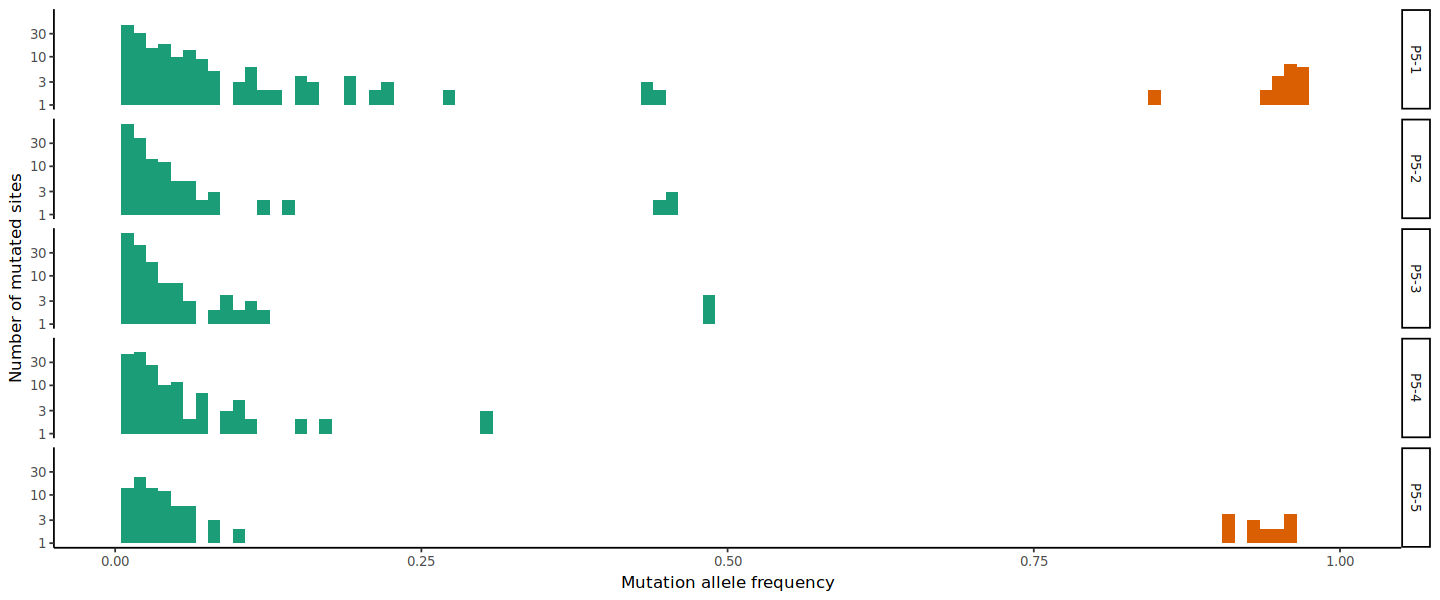

In [19]:
setwd(INDIR)
subs = c("68_P5-1","68_P5-2","68_P5-3","68_P5-4","68_P5-5")
dt1 <- data.table()
for(my.sample in subs){
    message("\tCalculating ", my.sample, "...")
    x <- read.delim(paste0(INDIR,my.sample,"_filtered_re.phy"),header = F, sep = " ",
                    colClasses=c("character","character"),skip = 2,
                    col.names = c("cellID","bi"))
    y = matrix(unlist(strsplit(t(x$bi), "")), nrow = nrow(x), byrow = TRUE)
    y <- as.data.table(y)
    y <- sapply(y, as.numeric )
    dt1 <- rbind(dt1, data.table(sample = my.sample,
                               sfs = colSums(y)/nrow(y), site = 1:3004))
}
df1 <- dt1[sfs >= 0.01]
df1[, mono := ifelse(sfs >=0.75, "Monoclonal","Polyclonal")]
mono <- as.data.table(table(df1[sfs>=0.75 & site !=2674, sample]))[N>=2]
df1[,sample := gsub("P","P",sample)]
df1[,sample := gsub("68_","",sample)]
p4 <- ggplot(df1, aes(x=sfs, fill= mono))+
  geom_histogram(bins = 100)+xlim(0,1)+
  facet_wrap(~sample,ncol=1,strip.position="right")+scale_y_log10()+
  scale_fill_manual(values = c(Polyclonal="#1B9E77",Monoclonal="#D95F02"))+theme_classic()+
  xlab("Mutation allele frequency")+ylab("Number of mutated sites")+
  theme(legend.position=c("none"),plot.title = element_text(hjust = 0.5),
        text = element_text(size=10))
p4



In [20]:
pdf(file = paste0(OUTDIR,"fig3E.Apc68_5_SFS.pdf"), width=4, height = 3.5)
p3
p4
dev.off()


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 393 rows containing missing values (`geom_bar()`).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 591 rows containing missing values (`geom_bar()`).”


png 
  2